In [12]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks")
%matplotlib inline 

In [9]:
# Load the example dataset of brain network correlations
df = pd.read_csv('billionaires.csv')
df.head()

,age,category,citizenship,company.name,company.type,country code,founded,from emerging,gdp,gender,...,name,rank,region,relationship,sector,was founder,was political,wealth.type,worth in billions,year
0,-1,Financial,Saudi Arabia,Rolaco Trading and Contracting Company,new,SAU,1968,True,1.580000e+11,male,...,Abdul Aziz Al-Sulaiman,404,Middle East/North Africa,founder,construction,True,False,self-made finance,1.0,1996
1,34,Financial,United States,Fidelity Investments,new,USA,1946,True,8.100000e+12,female,...,Abigail Johnson,145,North America,relation,investment banking,True,False,inherited,2.5,1996
2,59,Non-Traded Sectors,Brazil,Companhia Brasileira de Distribui?ao,new,BRA,1948,True,8.540000e+11,male,...,Abilio dos Santos Diniz,322,Latin America,relation,retail,True,False,inherited,1.2,1996
3,61,New Sectors,Germany,Ratiopharm,new,DEU,1881,True,2.500000e+12,male,...,Adolf Merckle,388,Europe,relation,pharmaceuticals,True,False,inherited,1.0,1996
4,-1,Financial,Hong Kong,Swire,new,HKG,1816,True,1.600000e+11,male,...,Adrian and John Swire,162,East Asia,relation,trading company,True,False,inherited,2.2,1996


In [10]:
df.shape

(2614, 22)

## Histogram

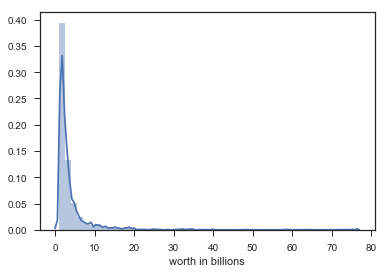

In [15]:
sns.distplot(df['worth in billions'])

In [16]:
# Worth in Billions binned
bins = np.arange(0, 80, 10)
df['worth_binned'] = pd.cut(df['worth in billions'], bins)

## Bar Chart

In [30]:
bar_chart = df[df.age > -1].groupby(['category', 'gender'])['age'].mean().reset_index()

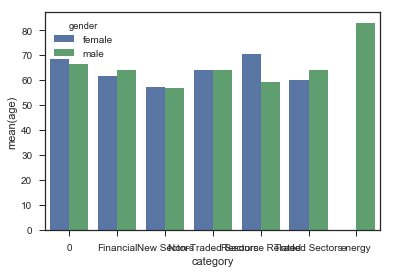

In [31]:
sns.barplot(x="category", y="age", hue="gender", data=bar_chart)

## Scatter plot - bivariate

In [32]:
#scatter_bi = df[df.age > -1].groupby(['year'])['age'].mean().reset_index()

In [33]:
#scatter_bi

,year,age
0,1996,58.991031
1,2001,61.572115
2,2014,63.342138


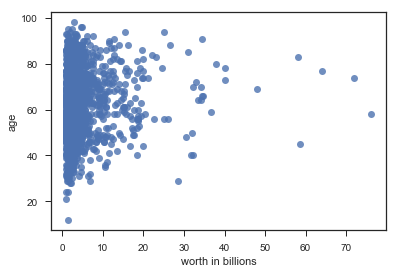

In [42]:
sns.regplot(x=df[df.age>0]["worth in billions"], y=df[df.age>0]["age"], fit_reg=False)

## Scatter Plot - Trivariate

In [51]:
#scatter_tri = df[(df.age > -1) & (df.region != '0')].groupby(['worth in billions', 'region'])['age'].mean().reset_index()

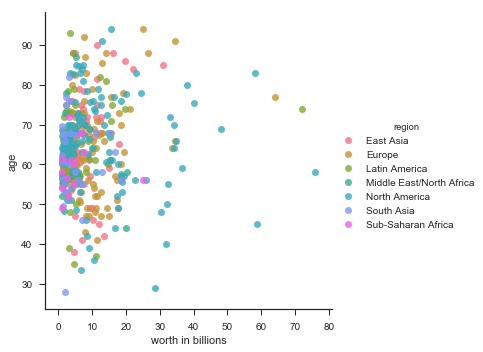

In [52]:
#sns.lmplot( x="worth in billions", y="age", data=scatter_tri, fit_reg=False, hue='region')

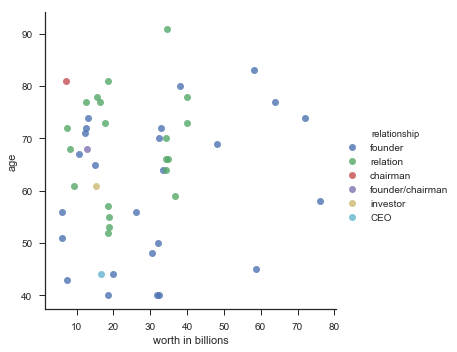

In [69]:
sns.lmplot( x="worth in billions", y="age", data=df[(df['rank'] < 20) & (df.age > -1)], fit_reg=False, hue='relationship')

## Swarm Plot

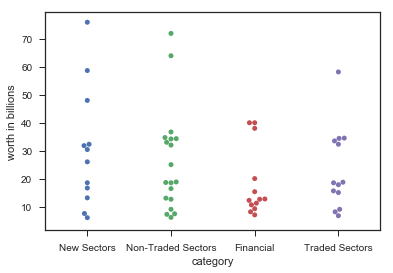

In [71]:
sns.swarmplot(x="category", y="worth in billions", data=df[df['rank'] < 20])

## Faceted Histogram

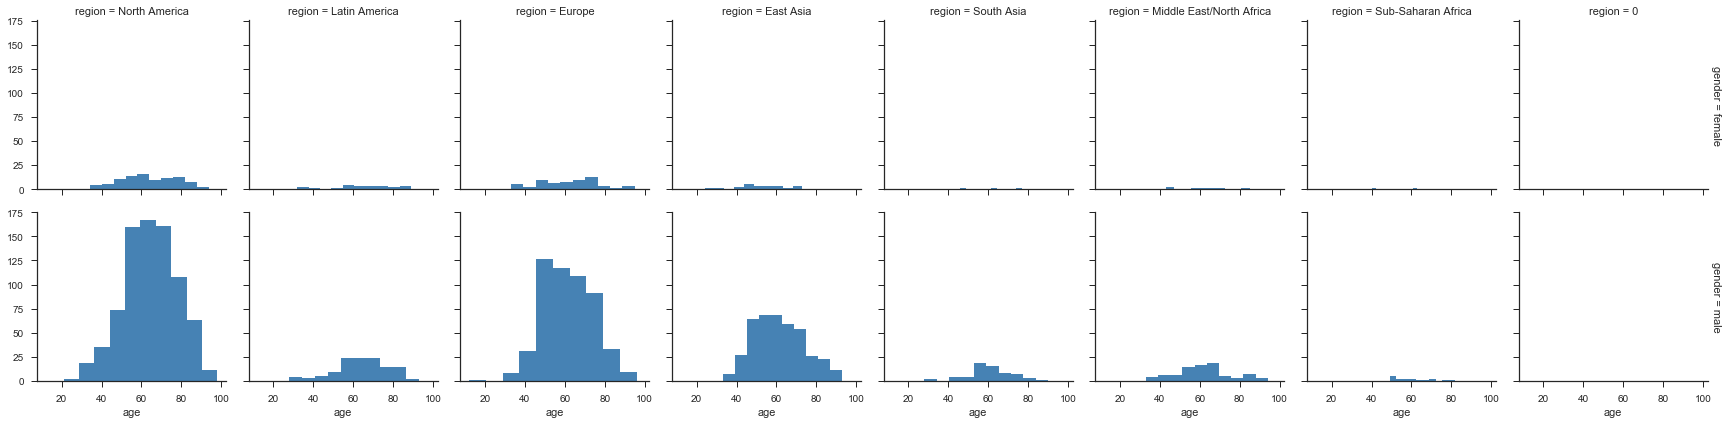

In [86]:
g = sns.FacetGrid(df[df.age > 0], row="gender", col="region", margin_titles=True)
#bins = np.linspace(0, 2000, 20)
g.map(plt.hist, "age", color="steelblue", lw=0)
plt.show() 

## Violin Plot

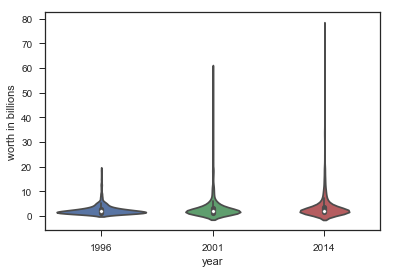

In [87]:
sns.violinplot(x="year", y="worth in billions", data=df)

## Other: Line

ValueError: cannot label index with a null key

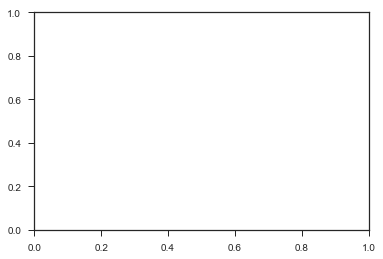

In [124]:
#line = df[df.region != '0'].groupby(['founded', 'relationship'])['age'].count().reset_index()
line = df[df.founded>0].groupby(['founded'])['age'].count().reset_index()
#heatmap_data.dropna(axis=0, how='any', inplace = True)
sns.tsplot(data=line)

In [94]:
df[df.region != '0'].groupby(['founded', 'region'])['age'].count().reset_index()

,founded,region,age
0,0,East Asia,21
1,0,Europe,12
2,0,Latin America,3
3,0,North America,4
4,1610,East Asia,2
5,1615,Europe,3
6,1668,Europe,1
7,1670,North America,1
8,1677,Europe,3
9,1712,Europe,2


In [125]:
line

,founded,age
0,1610,2
1,1615,3
2,1668,1
3,1670,1
4,1677,3
5,1712,2
6,1720,1
7,1756,1
8,1789,1
9,1792,1


## Other: Heatmap

In [130]:
heatmap_data = df[df.founded>0].groupby(['year', 'region'])['age'].count().reset_index()


In [131]:
sns.heatmap(heatmap_data, vmin=0, vmax=1)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

AttributeError: 'DataFrame' object has no attribute 'isnan'